In [4]:
import numpy as np
import torch 
import pandas as pd
import itertools
import init_params
import compute_prob
import init_model
import time
import helper
import main_sim
import importlib 
import params_search as ps
import seaborn as sns

import cProfile as profile
import pstats

importlib.reload(helper)
importlib.reload(compute_prob)
importlib.reload(init_params)
importlib.reload(init_model)
importlib.reload(main_sim)
importlib.reload(ps)

Fontconfig warning: ignoring UTF-8: not a valid region tag


<module 'params_search' from '/Users/mcfrank/Projects/pokebaby/looking_time_models/GRANCH_python/params_search.py'>

In [10]:
stimuli = init_model.granch_stimuli(1, "BBBBBD")
stimuli.get_stimuli_sequence("embedding_PCA.csv")
stimuli.stimuli_sequence

b


In [6]:
grid_params = ps.set_granch_grid_parameter(grid_mu_theta_starts = [-5],grid_mu_theta_ends = [5],grid_mu_theta_steps=[10],
                                grid_sig_sq_starts=[0.001],grid_sig_sq_ends=[1.8],grid_sig_sq_steps=[10],
                                grid_y_starts=[-5],grid_y_ends=[5],grid_y_steps=[10],
                                grid_epsilon_starts=[0.001],grid_epsilon_ends=[1.8],grid_epsilon_steps=[10])

priors = ps.set_granch_priors(mu_priors = [0.001], V_priors = [0.001], alpha_priors = [1], beta_priors = [1], epsilons = [0.000001], 
mu_epsilons = [0.001], sd_epsilons = [4], eigs = [0.0001])
params_search_space = ps.set_parameter_search(grid_params, priors)



#print(all_ps_res)

In [7]:
def timing_ps(run = 3): 
    all_times = {}
    for i in range(2, run): 
       print(i)
       start_time = time.perf_counter()
       grid_params = ps.set_granch_grid_parameter(grid_mu_theta_starts = [-5],grid_mu_theta_ends = [5],grid_mu_theta_steps=[i],
                                grid_sig_sq_starts=[0.001],grid_sig_sq_ends=[1.8],grid_sig_sq_steps=[i],
                                grid_y_starts=[-5],grid_y_ends=[5],grid_y_steps=[i],
                                grid_epsilon_starts=[0.001],grid_epsilon_ends=[1.8],grid_epsilon_steps=[i])
       priors = ps.set_granch_priors(mu_priors = [0.001], V_priors = [0.001], alpha_priors = [1], beta_priors = [1], 
                                epsilons = [0.000001], mu_epsilons = [0.001], sd_epsilons = [4], eigs = [0.0001])
       params_search_space = ps.set_parameter_search(grid_params, priors)
       all_ps_res = ps.run_parameter_search(params_search_space, stimuli)
       end_time = time.perf_counter()
       all_times[i] = (end_time - start_time)
    return all_times

improved_timing = timing_ps(3)

2
tensor([[-5.0000e+00,  1.0000e-03,  1.0000e-03],
        [-5.0000e+00,  1.0000e-03,  1.8000e+00],
        [-5.0000e+00,  1.0000e-03,  1.0000e-03],
        [-5.0000e+00,  1.0000e-03,  1.8000e+00],
        [-5.0000e+00,  1.8000e+00,  1.0000e-03],
        [-5.0000e+00,  1.8000e+00,  1.8000e+00],
        [-5.0000e+00,  1.8000e+00,  1.0000e-03],
        [-5.0000e+00,  1.8000e+00,  1.8000e+00],
        [ 5.0000e+00,  1.0000e-03,  1.0000e-03],
        [ 5.0000e+00,  1.0000e-03,  1.8000e+00],
        [ 5.0000e+00,  1.0000e-03,  1.0000e-03],
        [ 5.0000e+00,  1.0000e-03,  1.8000e+00],
        [ 5.0000e+00,  1.8000e+00,  1.0000e-03],
        [ 5.0000e+00,  1.8000e+00,  1.8000e+00],
        [ 5.0000e+00,  1.8000e+00,  1.0000e-03],
        [ 5.0000e+00,  1.8000e+00,  1.8000e+00]])
tensor([-7.9630e+06,  5.1764e-01, -1.0153e+08, -5.0000e+07, -7.9630e+06,
        -6.9779e+00, -5.1525e+07, -3.5855e+01, -5.7963e+07, -5.0000e+07,
        -5.1525e+07, -1.2928e+01, -7.9630e+06, -2.2410e+01, -5.1525

/Users/mcfrank/Projects/pokebaby/looking_time_models/.venv/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Users/mcfrank/Projects/pokebaby/looking_time_models/GRANCH_python/compute_prob.py:162: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res


{2: 0.03837212300277315, 3: 0.006573303995537572, 4: 0.009412598999915645, 5: 0.007304232000024058, 6: 0.007445088995154947, 7: 0.012469053006498143, 8: 0.013875720993382856}


In [8]:
improved_timing = timing_ps(8)


2
tensor([[-5.0000e+00,  1.0000e-03,  1.0000e-03],
        [-5.0000e+00,  1.0000e-03,  1.8000e+00],
        [-5.0000e+00,  1.0000e-03,  1.0000e-03],
        [-5.0000e+00,  1.0000e-03,  1.8000e+00],
        [-5.0000e+00,  1.8000e+00,  1.0000e-03],
        [-5.0000e+00,  1.8000e+00,  1.8000e+00],
        [-5.0000e+00,  1.8000e+00,  1.0000e-03],
        [-5.0000e+00,  1.8000e+00,  1.8000e+00],
        [ 5.0000e+00,  1.0000e-03,  1.0000e-03],
        [ 5.0000e+00,  1.0000e-03,  1.8000e+00],
        [ 5.0000e+00,  1.0000e-03,  1.0000e-03],
        [ 5.0000e+00,  1.0000e-03,  1.8000e+00],
        [ 5.0000e+00,  1.8000e+00,  1.0000e-03],
        [ 5.0000e+00,  1.8000e+00,  1.8000e+00],
        [ 5.0000e+00,  1.8000e+00,  1.0000e-03],
        [ 5.0000e+00,  1.8000e+00,  1.8000e+00]])
tensor([-7.9630e+06,  5.1764e-01, -1.0153e+08, -5.0000e+07, -7.9630e+06,
        -6.9779e+00, -5.1525e+07, -3.5855e+01, -5.7963e+07, -5.0000e+07,
        -5.1525e+07, -1.2928e+01, -7.9631e+06, -2.2410e+01, -5.1525

/Users/mcfrank/Projects/pokebaby/looking_time_models/GRANCH_python/compute_prob.py:162: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res
/Users/mcfrank/Projects/pokebaby/looking_time_models/GRANCH_python/compute_prob.py:162: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res
/Users/mcfrank/Projects/pokebaby/looking_time_models/GRANCH_python/compute_prob.py:162: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res


tensor([-1.1945e+07, -2.8345e+01, -5.6060e+00, -2.2180e+00, -5.9479e+06,
        -5.5556e+06, -5.5556e+06, -5.5556e+06, -4.4396e+07, -2.2222e+07,
        -2.2222e+07, -2.2222e+07, -1.2729e+08, -5.0000e+07, -5.0000e+07,
        -5.0000e+07, -1.1945e+07, -3.4743e+01, -1.2004e+01, -8.6160e+00,
        -3.9236e+05, -1.8122e+01, -1.9384e+01, -2.0448e+01, -2.2174e+07,
        -1.2468e+02, -8.0695e+01, -7.3365e+01, -7.7288e+07, -3.5443e+02,
        -1.9594e+02, -1.6736e+02, -1.1945e+07, -3.5435e+01, -1.2696e+01,
        -9.3083e+00, -3.9235e+05, -7.2726e+00, -8.5344e+00, -9.5987e+00,
        -2.2173e+07, -7.9209e+01, -3.5219e+01, -2.7889e+01, -7.7288e+07,
        -2.5124e+02, -9.2751e+01, -6.4179e+01, -1.1945e+07, -3.5840e+01,
        -1.3102e+01, -9.7135e+00, -3.9235e+05, -5.5366e+00, -6.7983e+00,
        -7.8627e+00, -2.2173e+07, -7.1050e+01, -2.7060e+01, -1.9729e+01,
        -7.7288e+07, -2.3238e+02, -7.3886e+01, -4.5313e+01, -1.7500e+07,
        -5.5556e+06, -5.5556e+06, -5.5556e+06, -3.9

/Users/mcfrank/Projects/pokebaby/looking_time_models/GRANCH_python/compute_prob.py:162: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res
/Users/mcfrank/Projects/pokebaby/looking_time_models/GRANCH_python/compute_prob.py:162: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res


tensor([-2.6755e+06, -5.4981e+01, -1.0529e+01, -2.8257e+00, -4.1776e-01,
         5.1764e-01, -6.7550e+05, -2.0251e+01, -1.6182e+01, -8.7139e+00,
        -6.3061e+00, -5.3707e+00, -6.7549e+05, -9.4310e+00, -6.9262e+00,
        -6.9266e+00, -6.4595e+00, -5.8789e+00, -6.7549e+05, -7.6978e+00,
        -5.1916e+00, -5.2671e+00, -5.4463e+00, -5.4680e+00, -6.7549e+05,
        -7.2358e+00, -4.7174e+00, -4.7846e+00, -5.0300e+00, -5.1914e+00,
        -6.7549e+05, -7.1115e+00, -4.5684e+00, -4.6101e+00, -4.8630e+00,
        -5.0669e+00, -6.7548e+05,  1.0007e+00,  3.5054e+00,  3.4176e+00,
         3.0957e+00,  2.7669e+00, -6.7549e+05, -4.8876e+00, -2.3829e+00,
        -2.4707e+00, -2.7926e+00, -3.1214e+00, -6.7549e+05, -5.5793e+00,
        -3.0693e+00, -3.1510e+00, -3.4688e+00, -3.7941e+00, -6.7549e+05,
        -5.9836e+00, -3.4350e+00, -3.4738e+00, -3.7643e+00, -4.0666e+00,
        -6.7549e+05, -6.2702e+00, -3.6748e+00, -3.6661e+00, -3.9284e+00,
        -4.2075e+00, -6.7549e+05, -6.4926e+00, -3.8

/Users/mcfrank/Projects/pokebaby/looking_time_models/GRANCH_python/compute_prob.py:162: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res


tensor([[-5.0000e+00,  1.0000e-03,  1.0000e-03],
        [-5.0000e+00,  1.0000e-03,  3.0083e-01],
        [-5.0000e+00,  1.0000e-03,  6.0067e-01],
        ...,
        [ 5.0000e+00,  1.8000e+00,  1.2003e+00],
        [ 5.0000e+00,  1.8000e+00,  1.5002e+00],
        [ 5.0000e+00,  1.8000e+00,  1.8000e+00]])
tensor([-7.9630e+06, -8.1435e+01, -1.6900e+01,  ..., -3.9471e+01,
        -2.7051e+01, -2.0423e+01], dtype=torch.float64)
tensor([-2.7234e+06, -8.1435e+01, -1.6900e+01, -5.4595e+00, -1.7411e+00,
        -1.9856e-01,  5.1764e-01, -2.6163e+05, -2.9246e+01, -1.9534e+01,
        -1.1165e+01, -7.4476e+00, -5.9051e+00, -5.1889e+00, -2.6158e+05,
        -1.7582e+01, -8.7758e+00, -7.5195e+00, -7.0015e+00, -6.2566e+00,
        -5.7279e+00, -2.6157e+05, -9.9898e+00, -6.9355e+00, -5.7776e+00,
        -5.5904e+00, -5.5058e+00, -5.4071e+00, -2.6157e+05, -7.2831e+00,
        -5.8478e+00, -5.1497e+00, -5.0610e+00, -5.1027e+00, -5.1428e+00,
        -2.6157e+05, -6.1189e+00, -5.0547e+00, -4.7518e+00,

In [9]:
#print(original_timing)
print(improved_timing)

for key in original_timing: 
    original_timing[key] = original_timing[key][0]
    #improved_timing[key] = [improved_timing[key]]


NameError: name 'original_timing' is not defined

/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/847355892.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cb_df = o_df.append(n_df)


<AxesSubplot:xlabel='grid_step', ylabel='t'>

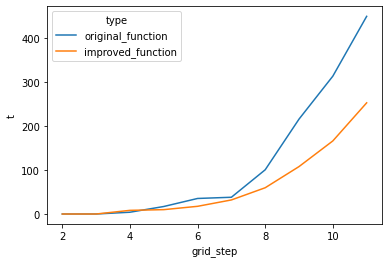

In [165]:
o_df = pd.DataFrame.from_dict(original_timing, orient = "index")
o_df["t"] = o_df[0]
o_df["type"] = "original_function"

n_df = pd.DataFrame.from_dict(improved_timing, orient = "index")
n_df["t"] = n_df[0]
n_df["type"] = "improved_function"

cb_df = o_df.append(n_df)
cb_df.index.name = 'grid_step'
cb_df.reset_index(inplace=True)
cb_df
#pd.DataFrame(improved_timing)

sns.lineplot(x='grid_step', y='t', hue='type', 
             data=cb_df)

In [92]:

prof = profile.Profile()
prof.enable()

all_ps_res = ps.run_parameter_search(params_search_space, stimuli)
prof.disable()

stats = pstats.Stats(prof).strip_dirs().sort_stats("cumtime")
stats.print_stats() # top 10 rows

??
         2384 function calls (2361 primitive calls) in 0.035 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.035    0.018 interactiveshell.py:3362(run_code)
        2    0.000    0.000    0.035    0.018 {built-in method builtins.exec}
        1    0.000    0.000    0.035    0.035 1070387720.py:1(<cell line: 4>)
        1    0.000    0.000    0.035    0.035 params_search.py:13(run_parameter_search)
        1    0.000    0.000    0.034    0.034 params_search.py:16(run_model_with_parameter)
        1    0.000    0.000    0.026    0.026 init_params.py:114(add_priors)
      2/1    0.000    0.000    0.026    0.026 _jit_internal.py:413(fn)
        1    0.000    0.000    0.026    0.026 functional.py:845(_return_output)
        1    0.000    0.000    0.026    0.026 functional.py:688(_unique_impl)
        1    0.026    0.026    0.026    0.026 {built-in method unique_dim}
        1    0.000    0.0

/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  


<AxesSubplot:xlabel='stimulus_id'>

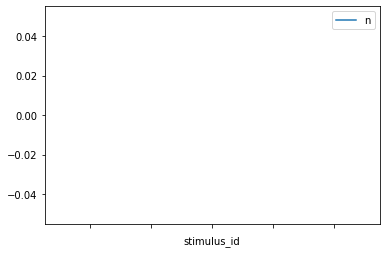

In [93]:


sample_df = all_ps_res[0][0].groupby(['stimulus_id'], as_index=False).count()
sample_df["stimulus_id"] = sample_df["stimulus_id"]+1
sample_df["n"] = sample_df["EIG"]

sample_df.plot.line(x = "stimulus_id", y = "n")


In [178]:
def timing_ps(run = 3): 
    all_sims_res = pd.DataFrame()
    for i in range(2, run): 
       print(i)
       grid_params = ps.set_granch_grid_parameter(grid_mu_theta_starts = [-5],grid_mu_theta_ends = [5],grid_mu_theta_steps=[i],
                                grid_sig_sq_starts=[0.001],grid_sig_sq_ends=[1.8],grid_sig_sq_steps=[i],
                                grid_y_starts=[-5],grid_y_ends=[5],grid_y_steps=[i],
                                grid_epsilon_starts=[0.001],grid_epsilon_ends=[1.8],grid_epsilon_steps=[i])
       priors = ps.set_granch_priors(mu_priors = [0.001], V_priors = [0.001], alpha_priors = [1], beta_priors = [1], epsilons = [0.000001], mu_epsilons = [0.001], sd_epsilons = [4], eigs = [0.0001])
       params_search_space = ps.set_parameter_search(grid_params, priors)
       all_ps_res = ps.run_parameter_search(params_search_space, stimuli)
       ps_res = all_ps_res[0][0]
       ps_res["grid_step"] = i 
       all_sims_res = all_sims_res.append(ps_res)
    return all_sims_res




improved_timing = timing_ps(8)
improved_timing.index.name = 't'
improved_timing.reset_index(inplace=True)


2
3
4


/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14:

5


/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  


6


/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  


7


/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)


In [97]:

grid_mu_steps = [2,5,11,20,50,100]
time = list(map(lambda x: x[1], all_ps_res))

res = pd.DataFrame({
    "grid_mu_step": grid_mu_steps,
    "time": time
})

res.plot.line(x = "grid_mu_step", y = "time")


ValueError: All arrays must be of the same length

<AxesSubplot:xlabel='t', ylabel='EIG'>

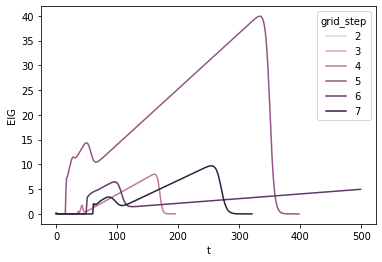

In [179]:
sns.lineplot(x='t', y='EIG', hue='grid_step', 
             data=improved_timing)

In [ ]:
def run_everything():
  start_time = time.perf_counter()
  p = init_params.granch_params(
      grid_mu_theta = torch.linspace(start = -1, end = 1, steps = 11),
      grid_sig_sq = torch.linspace(start = 0.001, end = 1.8, steps = 10), 
      grid_y = torch.linspace(start = -1, end = 1, steps = 11), 
      grid_epsilon =  torch.linspace(start = 0.001, end = 1.8, steps = 10), 
      hypothetical_obs_grid_n = 3, 
      mu_prior = 0.001,
      V_prior = 0.001, 
      alpha_prior = 1, 
      beta_prior = 1,
      epsilon  = 0.000001, 
      mu_epsilon = torch.tensor([0.001]), 
      sd_epsilon = torch.tensor([4]), 
      world_EIGs = 0.0001,
      max_observation = 500)
  p.add_meshed_grid()
  p.add_lp_mu_sig_sq()
  p.add_y_given_mu_sig_sq()
  p.add_lp_epsilon()
  p.add_priors()
  s = init_model.granch_stimuli(1, 'BBBBBB')
  m = init_model.granch_model(500, s)
  res = main_sim.granch_main_simulation(p, m, s)
  end_time = time.perf_counter()
  return(end_time - start_time)



timing = [] 
for x in range(50):
  t = run_everything()
  timing.append(t)



/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:151: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:151: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_83870/1363847840.py", line 33, in <cell line: 32>
    t = run_everything()
  File "/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_83870/1363847840.py", line 25, in run_everything
    res = main_sim.granch_main_simulation(p, m, s)
  File "/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/main_sim.py", line 83, in granch_main_simulation
    model.ps_likelihood = compute_prob.score_likelihood(model, params, hypothetical_obs=True)
  File "/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py", line 107, in score_likelihood
    likelihood = helper.group_by_logsumexp(grouping_base, lp_z_given_mu_sig_sq_for_y)
  File "/Users/caoanjie/Desktop/projects/mode

<AxesSubplot:xlabel='sim_id'>

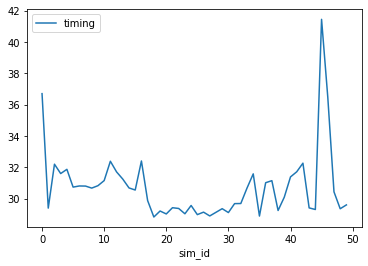

In [ ]:
t_df = pd.DataFrame({"timing": timing})
t_df.index.name = 'sim_id'
t_df.reset_index(inplace=True)

t_df.plot.line(x = "sim_id", y = "timing")